# SpaceX Falcon 9 First Stage Landing Prediction - Exploratory Data Analysis with Visualization

## Objective
In this notebook, we will perform exploratory data analysis (EDA) using visualization techniques to understand the relationships between various features and the success of Falcon 9 first stage landings.

## Key Questions to Answer:
- How does payload mass affect landing success?
- Which launch sites have the highest success rates?
- What is the relationship between orbit types and landing success?
- How has the success rate evolved over time?

## Import Required Libraries
We'll import the necessary Python libraries for data manipulation and visualization:
- **pandas**: For data manipulation and analysis
- **numpy**: For numerical operations
- **matplotlib**: For creating static plots
- **seaborn**: For statistical data visualization

In [27]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset
Load the cleaned SpaceX launch data that was prepared in the data wrangling phase.

In [28]:
# Load the cleaned SpaceX launch dataset
spacex_df = pd.read_csv("spacex_launch_data_clean.csv")

In [29]:
# Check the shape and basic info of the dataset
print(f"Dataset shape: {spacex_df.shape}")
print(f"\nColumn names and types:")
print(spacex_df.dtypes)
print(f"\nMissing values:")
print(spacex_df.isnull().sum())

Dataset shape: (90, 18)

Column names and types:
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

Missing values:
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64


In [30]:
# Display first few rows of the dataset
spacex_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Exploratory Data Analysis with Visualizations

### 1. Relationship between Flight Number and Payload Mass
This visualization helps us understand how payload mass varies across flights and whether it affects landing success (Class = 1 for successful landing, Class = 0 for unsuccessful).

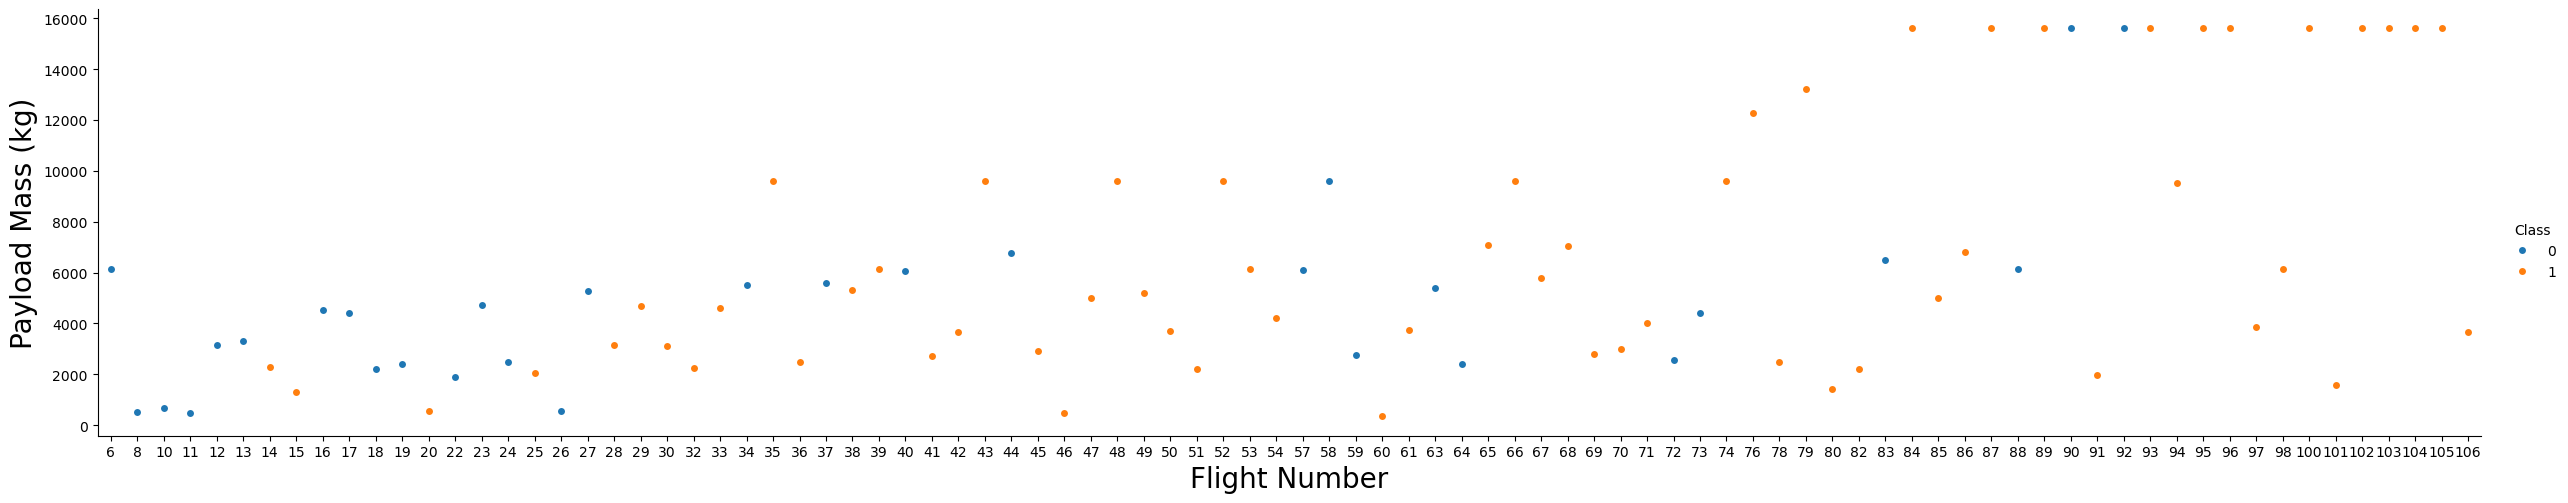

In [31]:
# Visualize the relationship between Flight Number and Payload Mass
# Color-coded by landing outcome (Class: 1=Success, 0=Failure)
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=spacex_df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()

### 2. Relationship between Flight Number and Launch Site
Analyzing which launch sites have been used over time and their success rates.

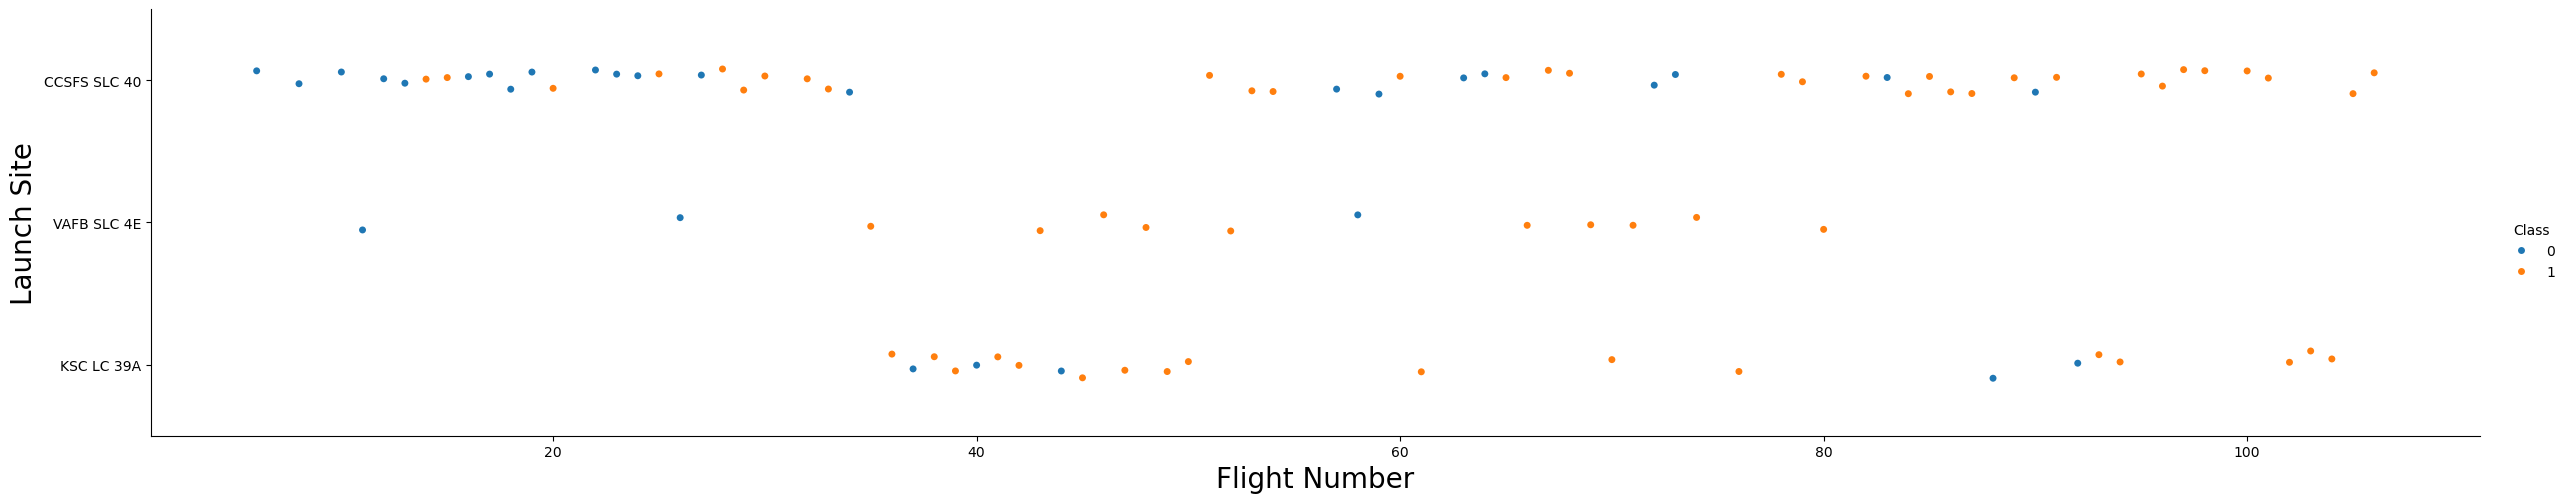

In [32]:
# Visualize the relationship between Flight Number and Launch Site
# Shows which launch sites are used over time and their success rates
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=spacex_df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

### 3. Relationship between Payload Mass and Launch Site
This plot shows how different launch sites handle different payload masses and their success rates.

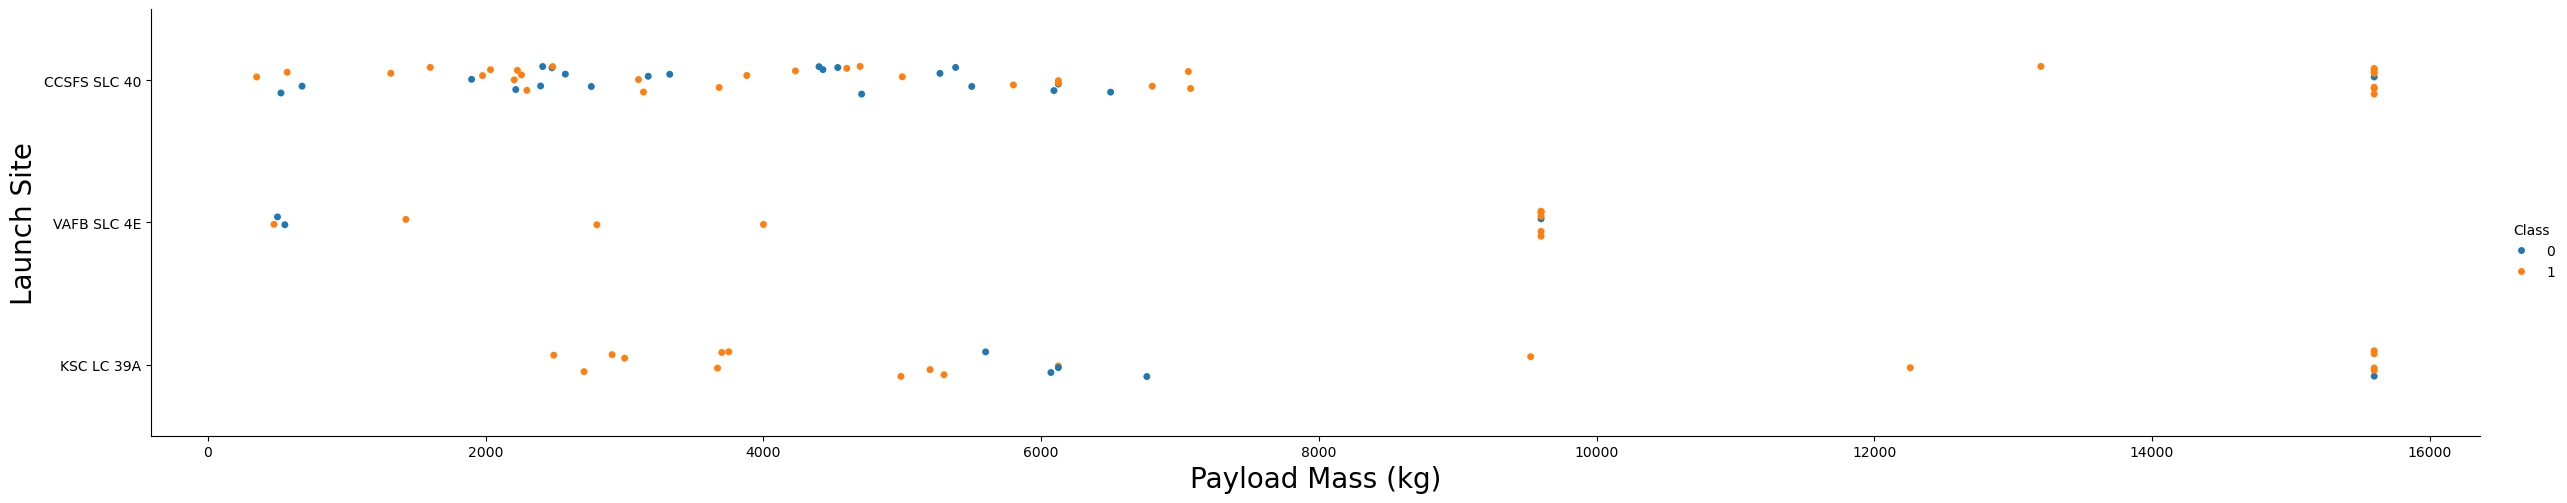

In [33]:
# Visualize the relationship between Payload Mass and Launch Site
# Analyze how different launch sites handle varying payload masses
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=spacex_df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

### 4. Success Rate by Orbit Type
Different orbit types may have different success rates due to varying mission requirements and difficulty levels.

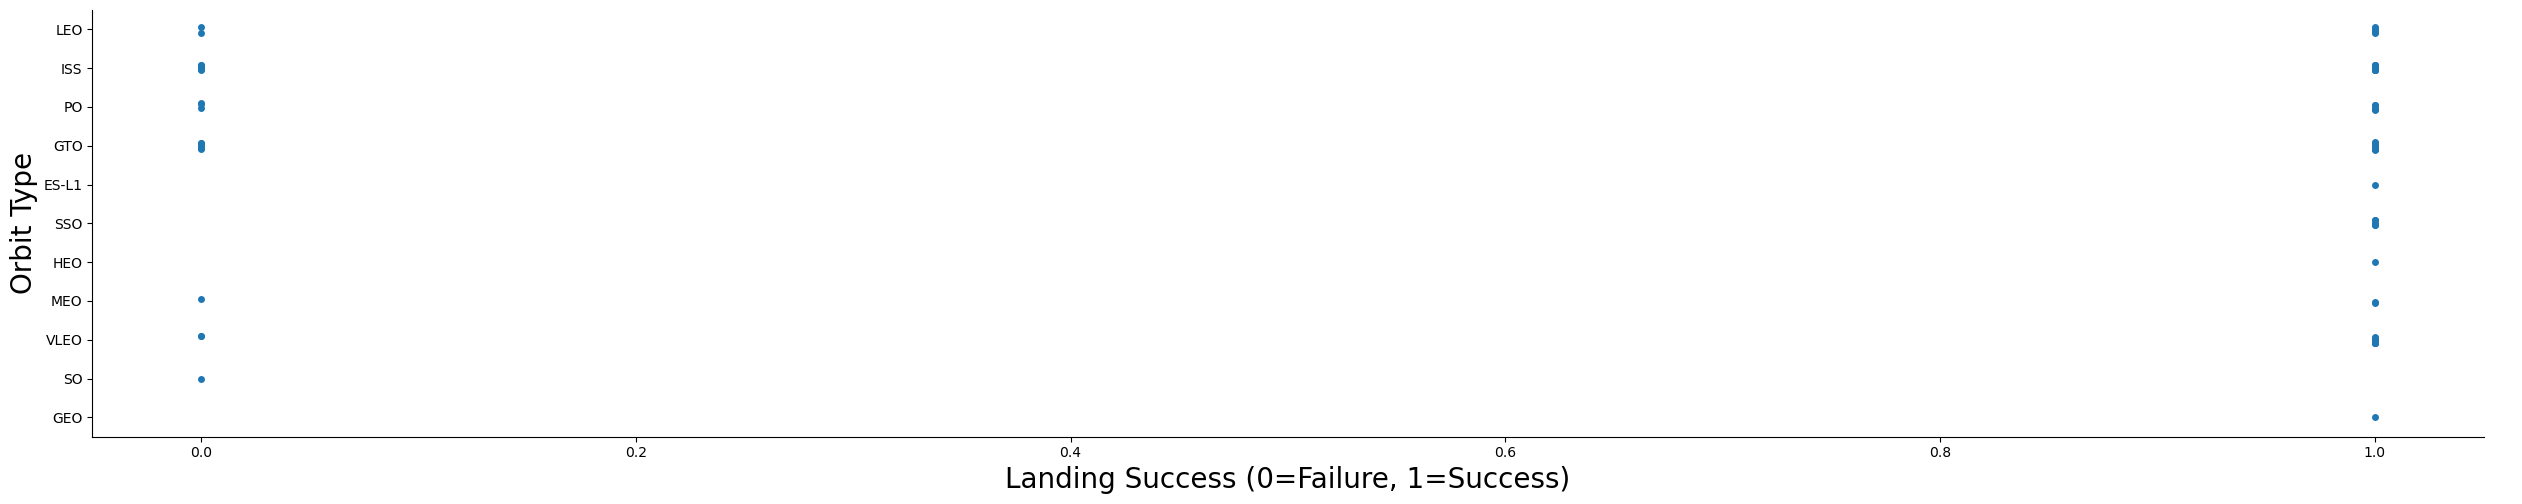

In [34]:
# Visualize the success rate distribution for each orbit type
# Shows which orbits have higher success rates for first stage landing
sns.catplot(y="Orbit", x="Class", data=spacex_df, aspect=5)
plt.xlabel("Landing Success (0=Failure, 1=Success)", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.show()

### 5. Relationship between Flight Number and Orbit Type
Understanding how orbit types have evolved over the course of SpaceX missions.

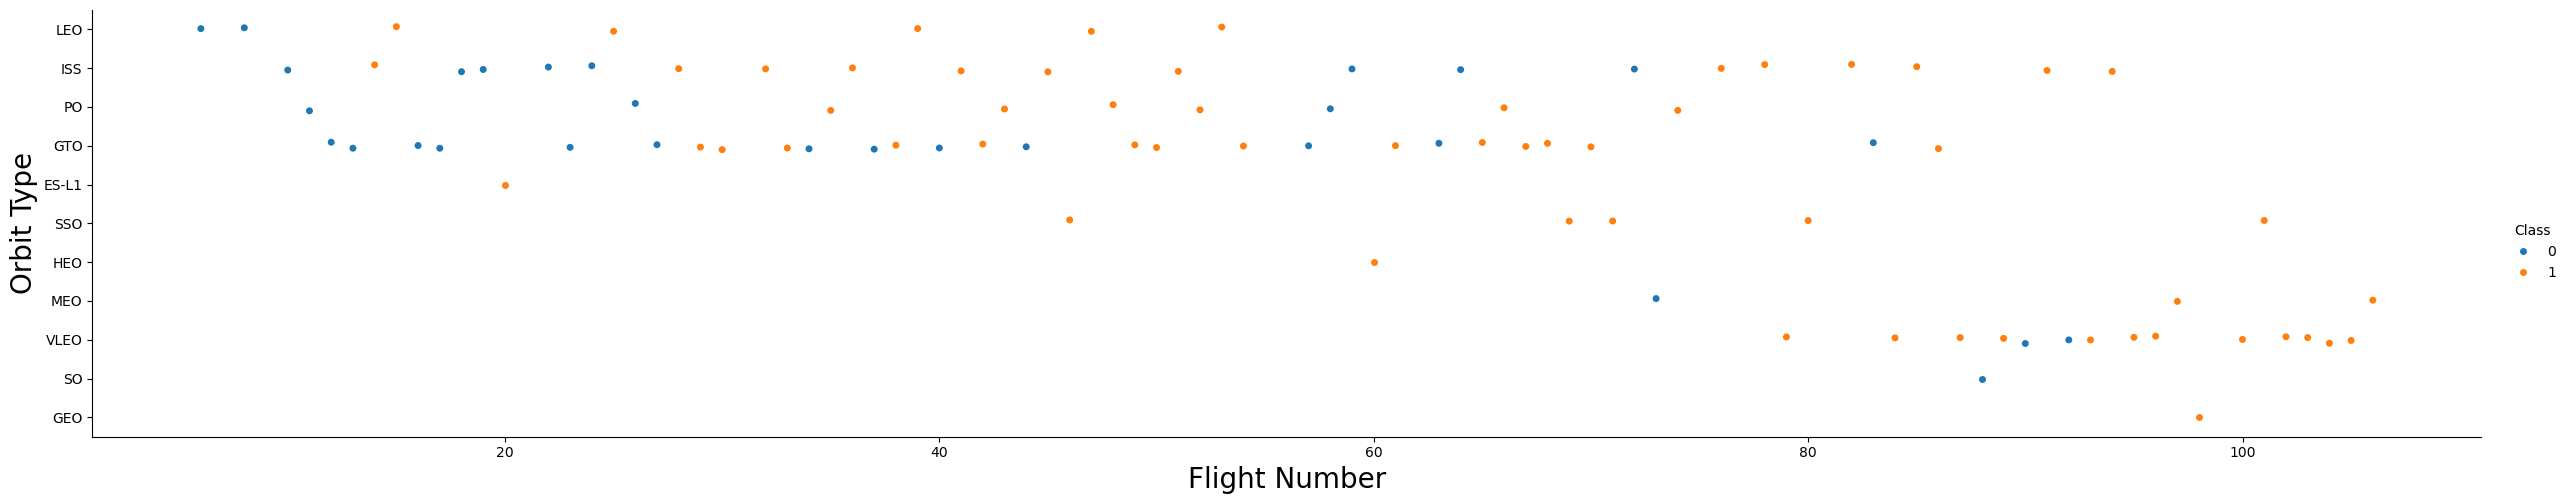

In [35]:
# Visualize the relationship between Flight Number and Orbit Type
# Track how SpaceX missions to different orbits have evolved over time
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=spacex_df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.show()

### 6. Relationship between Payload Mass and Orbit Type
Examining which orbit types typically carry heavier payloads and their landing outcomes.

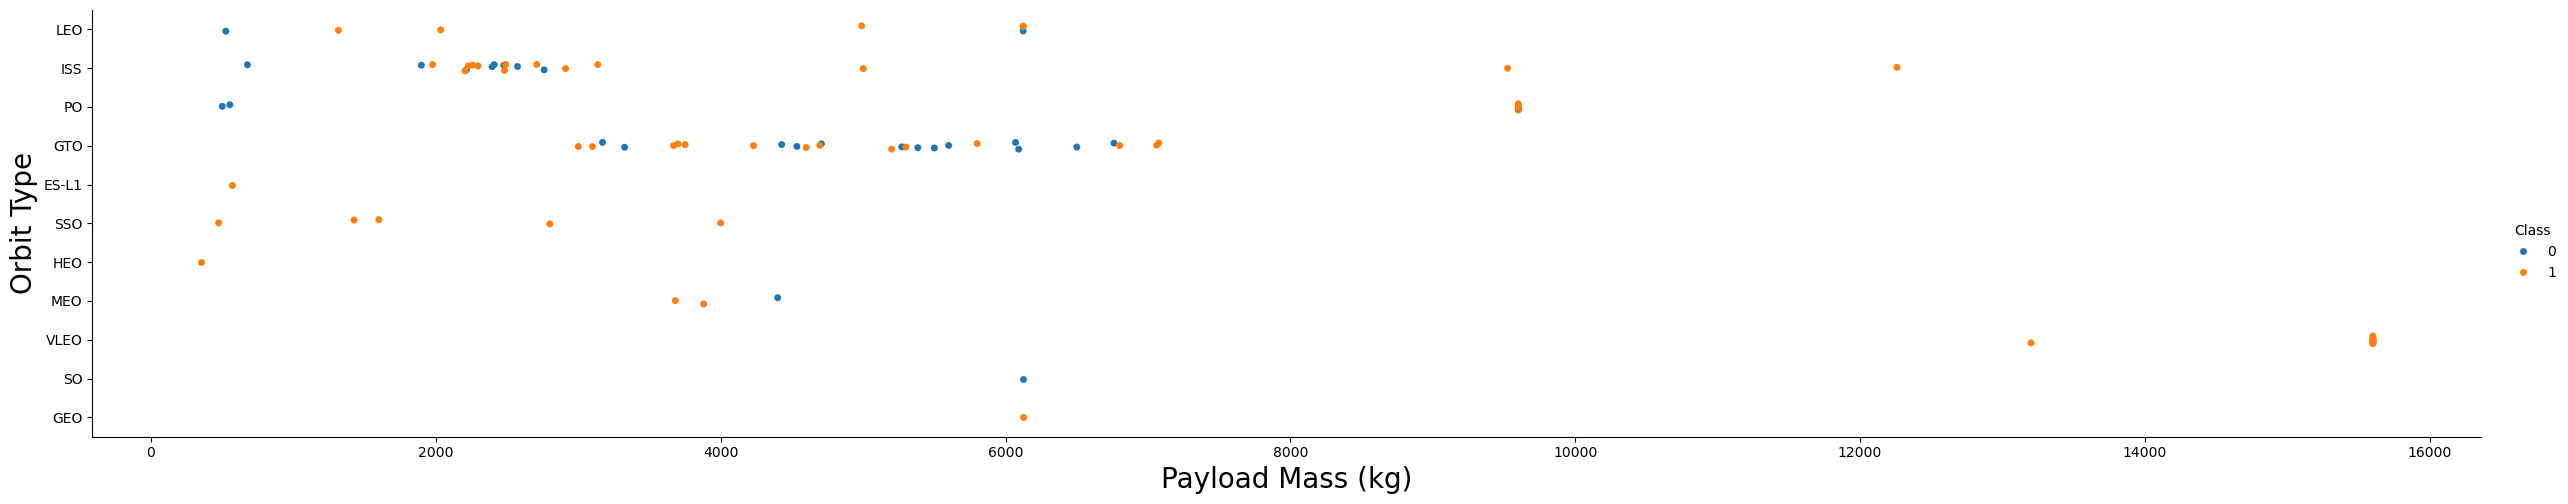

In [36]:
# Visualize the relationship between Payload Mass and Orbit Type
# Examine payload capacities for different orbit missions
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=spacex_df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.show()

### 7. Launch Success Yearly Trend
Tracking how SpaceX's landing success rate has improved over the years, demonstrating technological advancement and learning.

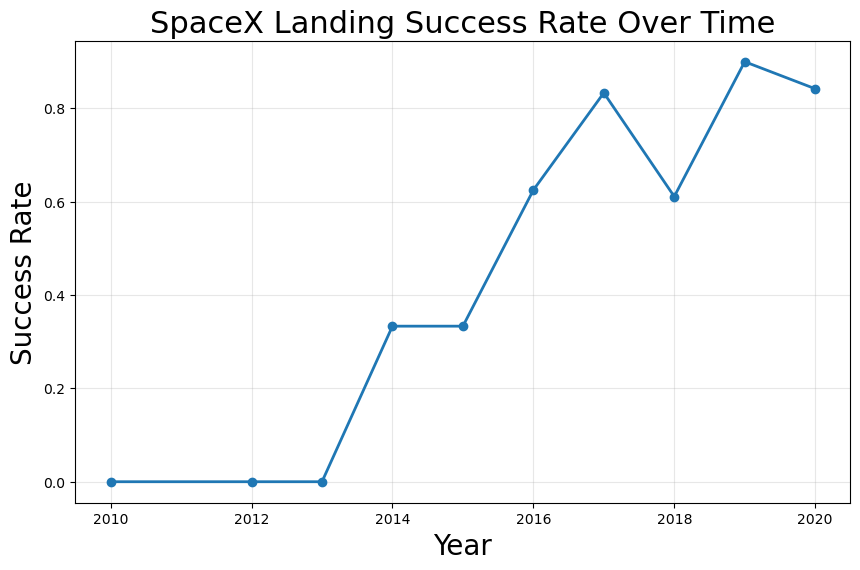

In [37]:
# Analyze the yearly trend of landing success rates
# Extract year from date and calculate average success rate per year
spacex_df['Year'] = pd.DatetimeIndex(spacex_df['Date']).year
yearly_success = spacex_df.groupby(['Year'])['Class'].mean().reset_index()

# Plot the success rate trend over years
plt.figure(figsize=(10, 6))
plt.plot(yearly_success['Year'], yearly_success['Class'], marker='o', linewidth=2)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.title('SpaceX Landing Success Rate Over Time', fontsize=22)
plt.grid(True, alpha=0.3)
plt.show()

## Feature Engineering

### Select Features for Machine Learning
We select the most relevant features that will be used to build our predictive model. These features include:
- **FlightNumber**: Sequential flight identifier
- **PayloadMass**: Mass of the payload in kg
- **Orbit**: Target orbit type
- **LaunchSite**: Location from which the rocket was launched
- **Flights**: Number of flights for this booster
- **GridFins**: Whether grid fins were used (True/False)
- **Reused**: Whether the booster was reused (True/False)
- **Legs**: Whether landing legs were deployed (True/False)
- **LandingPad**: Target landing pad
- **Block**: Block number of the booster
- **ReusedCount**: Number of times this booster has been reused
- **Serial**: Booster serial number

In [38]:
# Select relevant features for machine learning model
# Include both numerical and categorical features that may influence landing success
features = spacex_df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
                      'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 
                      'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,6,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,8,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,10,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,11,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,12,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create Dummy Variables
Convert categorical features into numerical format using one-hot encoding. This is necessary because machine learning algorithms require numerical inputs.

We use `drop_first=True` to avoid the dummy variable trap (multicollinearity).

In [39]:
# Convert categorical variables to numerical using one-hot encoding
# drop_first=True removes one dummy variable to avoid multicollinearity
features = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], 
                          drop_first=True)
features.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12,3170.000000,1,False,False,False,1.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


### Convert All Features to Float64
Ensure all numeric columns are in the same data type (float64) for consistency in machine learning algorithms.

In [40]:
# Convert all features to float64 data type for ML algorithm compatibility
# Ensures consistent numerical format across all features
features = features.astype('float64')
features.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object

### Export Features Dataset
Save the processed features to a CSV file for use in machine learning model training and evaluation.

In [41]:
# Export the engineered features to CSV for machine learning model training
features.to_csv('spacex_features.csv', index=False)
print("Features successfully exported to 'spacex_features.csv'")

Features successfully exported to 'spacex_features.csv'


## Summary of Findings

Through this exploratory data analysis, we have discovered several key insights:

1. **Payload Mass Impact**: There appears to be a relationship between payload mass and landing success, with certain payload ranges showing better success rates.

2. **Launch Site Performance**: Different launch sites demonstrate varying success rates, which could be influenced by factors like location, infrastructure, and mission types.

3. **Orbit Type Influence**: Certain orbit types (e.g., LEO, GTO) have different success rates, likely due to varying mission difficulty and energy requirements.

4. **Temporal Improvement**: The success rate has generally improved over time, indicating SpaceX's continuous learning and technological advancement.

5. **Feature Preparation**: The features have been engineered and prepared for machine learning model development, with:
   - Categorical variables converted to numerical format via one-hot encoding
   - All features standardized to float64 data type
   - Data exported for model training
